# Grism Efficiency vs Fringe Frequency
Use this notebook as a template to create a tradebook.

In [123]:
# external
import astropy.units as unit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plot
from IPython.display import display

# project
from payload_designer.components import diffractors
from payload_designer.libs import utillib

# import astropy.units as unit

## Setup
Run this section onwards when a parameter is updated.

### Parameters

In [124]:
# region constants
a_in = np.linspace(start=0, stop=5, num=5)
l = np.linspace(start=1400, stop=1800, num=5)  # [nm]
v = np.linspace(start=900, stop=1200, num=5)  # [L/mm]

a = 90
d = 2.5
eff_mat = 0.85
m = 1
n_1 = 1.0
n_2 = 1.52
n_3 = 1.3
n_g = 0.1
# endregion

# region variables
shape = (a_in.size, v.size, l.size, 1, 1, 1, 1, 1, 1, 1)

a_in = utillib.orient_and_broadcast(a=a_in, dim=0, shape=shape)
v = utillib.orient_and_broadcast(a=v, dim=1, shape=shape)
l = utillib.orient_and_broadcast(a=l, dim=2, shape=shape)
d = utillib.orient_and_broadcast(a=d, dim=3, shape=shape)
a = utillib.orient_and_broadcast(a=a, dim=4, shape=shape)
n_g = utillib.orient_and_broadcast(a=n_g, dim=5, shape=shape)
n_1 = utillib.orient_and_broadcast(a=n_1, dim=6, shape=shape)
n_2 = utillib.orient_and_broadcast(a=n_2, dim=7, shape=shape)
n_3 = utillib.orient_and_broadcast(a=n_3, dim=8, shape=shape)
eff_mat = utillib.orient_and_broadcast(a=eff_mat, dim=9, shape=shape)

fringe_frequency = np.arange(start=10, stop=1200, step=10)  # * (1 / unit.mm)
# endregion

# vectorization
incident_angle = 60  # * unit.degree

### Artifact Instantiation

In [125]:
# region components
diffractor1 = diffractors.VPHGrism(
    index_dcg_amplitude=n_g,
    index_dcg=n_2,
    dcg_thickness=d,
    fringe_frequency=fringe_frequency,
)
# diffractor = diffractors.VPHGrism(
#     m=m,
#     l=l,
#     v=v,
#     a_in=a_in,
#     eff_mat=eff_mat,
#     a=a,
#     d=d,
#     n_g=n_g,
#     n_3=n_3,
#     n_2=n_2,
#     n_1=n_1,
# )
# endregion


# region systems

# endregion

## Pipeline
The computational graph

In [126]:
pointing_constraint = diffractor1.get_efficiency(incident_angle=60, order=1, n_air=1)

## Plots

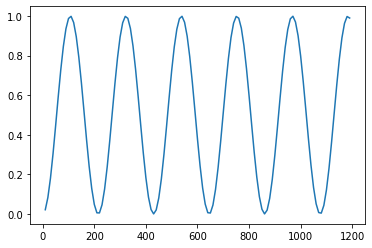

In [127]:
fringe_frequency_label = f"Fringe Density"
grism_efficiency_label = f"Grism Efficiency"
# print(list(pointing_constraint))
plt.xlabel = fringe_frequency_label
plt.ylabel = grism_efficiency_label
plt.plot(fringe_frequency, pointing_constraint[0][0][0][0][0][0][0][0][0])
# data = {
#     fringe_frequency_label: fringe_frequency,
#     grism_efficiency_label: pointing_constraint,
# }

# # df = pd.DataFrame.from_dict(data=data)
# graph = plot.line(
#     df=data,
#     x=fringe_frequency_label,
#     y=[grism_efficiency_label],
#     title=None,
#     dark=False,
# )

# graph.show()
# display(data)